
# ASSIGNED Quiz 2



The vapor pressure of water has been measured as a function of temperature in the following data:



In [1]:
import numpy as np

# Temperature in degrees C
T = np.array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
                55.,  60.,  65.,  70.,  75.,  80.])

# Water vapor pressure in kPa
Pvap = np. array([  0.6113,   0.8726,   1.2281,   1.7056,   2.3388,   3.169 ,
          4.2455,   5.6267,   7.3814,   9.5898,  12.344 ,  15.752 ,
         19.932 ,  25.022 ,  31.176 ,  38.563 ,  47.373 ])

The Tetens equation:

$P = A e^{B T / (T + C)}$

is sometimes used to model temperature dependent vapor pressures. Use the data above to find the coefficients $A, B, C$. Make sure to show that your answer fits the data.



Use your parameters to solve for the temperature at which the vapor pressure is 101.32 kPa. Note this should be the boiling point of water at 1 atm. Compare your answer to what you expected, and discuss reasons why there could be some differences.




## Solution



I chose to use `scipy.optimize.minimize` to solve this problem.



fun: 0.00012180003902405202
 hess_inv: array([[  2.74100680e-02,   5.70396141e-01,   1.36602804e+01],
       [  5.70396141e-01,   1.36368228e+01,   3.15978881e+02],
       [  1.36602804e+01,   3.15978881e+02,   7.37745489e+03]])
      jac: array([  8.20738307e-04,   1.22716443e-04,  -6.72944589e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 637
      nit: 44
     njev: 125
   status: 2
  success: False
        x: array([   0.60699675,   17.0171794 ,  232.43079154])



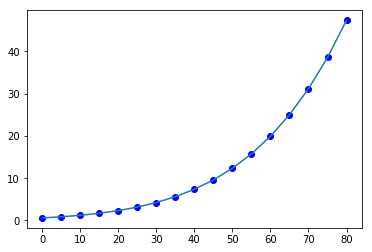

In [1]:
def model(pars, T):
    A, B, C = pars
    return A * np.exp(B * T / (T + C))

def objective(pars):
    errs = Pvap - model(pars, T)
    return np.sum(errs**2)

from scipy.optimize import minimize
%matplotlib inline
import matplotlib.pyplot as plt

sol = minimize(objective, [0.6, 20, 200])
print(sol)
plt.plot(T, Pvap, 'bo', T, model(sol.x, T))

Note that the default solver does not claim success "due to precision loss". However, the fit appears to be fine.  What appears to happen is that there is a lot of uncertainty in one of the parameters, and the solver has detected that it is not able to get the precision it is expecting.



In [1]:
np.sqrt(np.diag(sol.hess_inv))

array([  0.16555986,   3.69280689,  85.89211191])

You can "fix" this problem by using another optimizer method that does not rely on the Hessian, e.g. Nelder-Mead.



In [1]:
minimize(objective, [0.6, 20, 200], method='Nelder-Mead')

final_simplex: (array([[   0.60700607,   17.01738072,  232.4355726 ],
       [   0.60700616,   17.01738344,  232.43563349],
       [   0.60700621,   17.0173844 ,  232.4356559 ],
       [   0.60700611,   17.01738317,  232.435622  ]]), array([ 0.0001218,  0.0001218,  0.0001218,  0.0001218]))
           fun: 0.00012179836738110874
       message: 'Optimization terminated successfully.'
          nfev: 223
           nit: 124
        status: 0
       success: True
             x: array([   0.60700607,   17.01738072,  232.4355726 ])

You can see from this that the parameters are practically identical, so the warning from the default solver can be ignored.

To find the boiling point we use `scipy.optimize.fsolve`.



In [1]:
from scipy.optimize import fsolve

def obj(T):
    return 101.32 - model(sol.x, T)

Tboil, = fsolve(obj, 100)
print(f'The boiling point is estimated to be {Tboil:1.2f} degC.')

The boiling point is estimated to be 99.96 degC.

This is practically what we expect for the boiling point of water. It is not expected to be exactly 100 degC because there is uncertainty (that we did not quantify) in the parameters.

